In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from viz_utils import *
from dataloaders import *

In [4]:
experiments, meta = load_results(base_dir="results/", dataset="SST", model="JWA")
df_tr, df_agr, df_crt_train, df_crt_test, df_attr = results_to_df(experiments, meta)

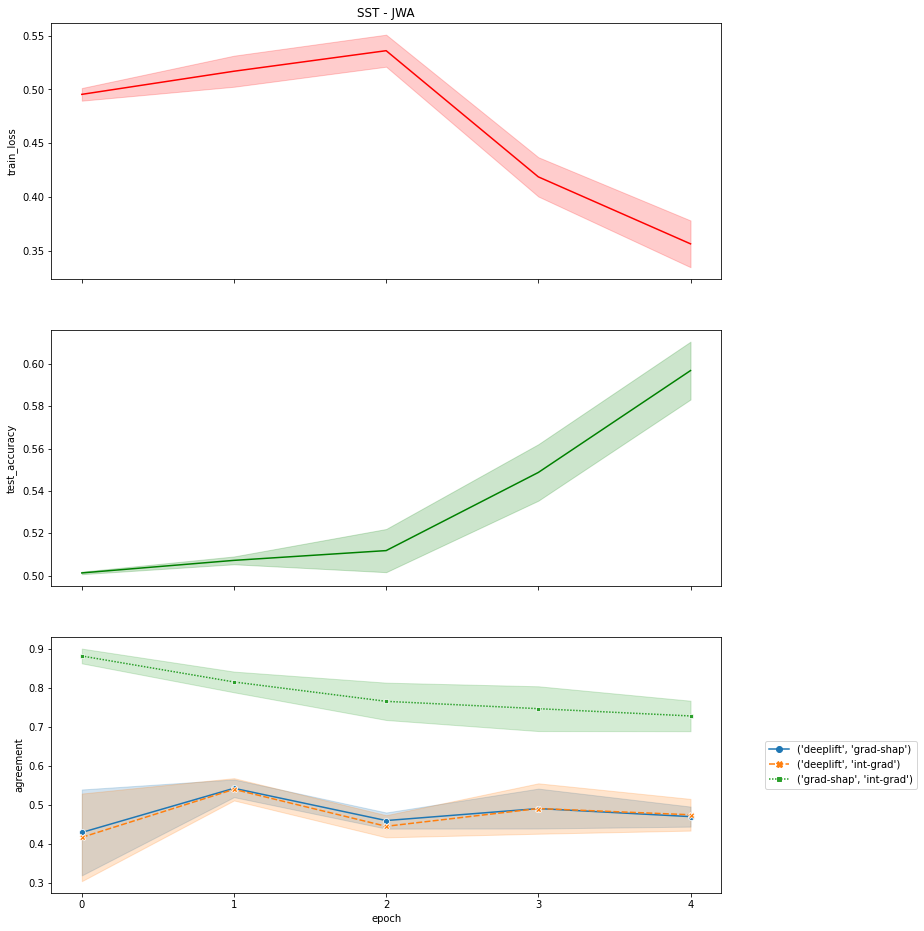

In [5]:
plot_experiment(df_tr, df_agr, meta)

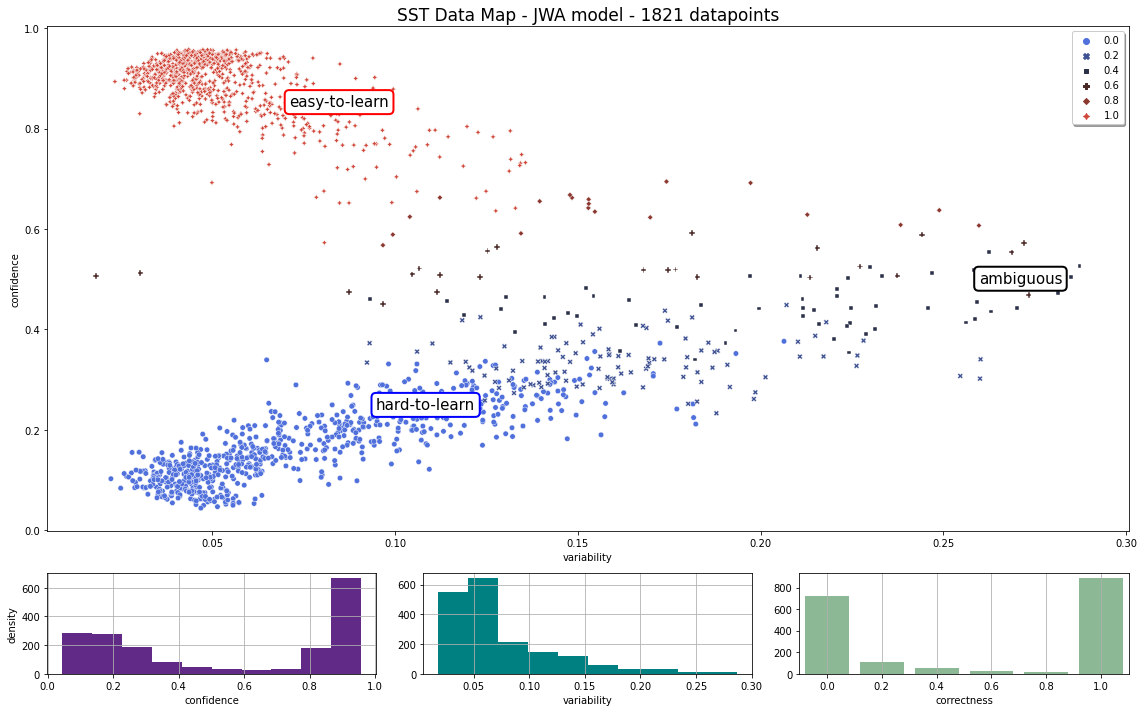

In [10]:
fig = plot_cartography(df_crt_test, meta, hue_metric="correct");

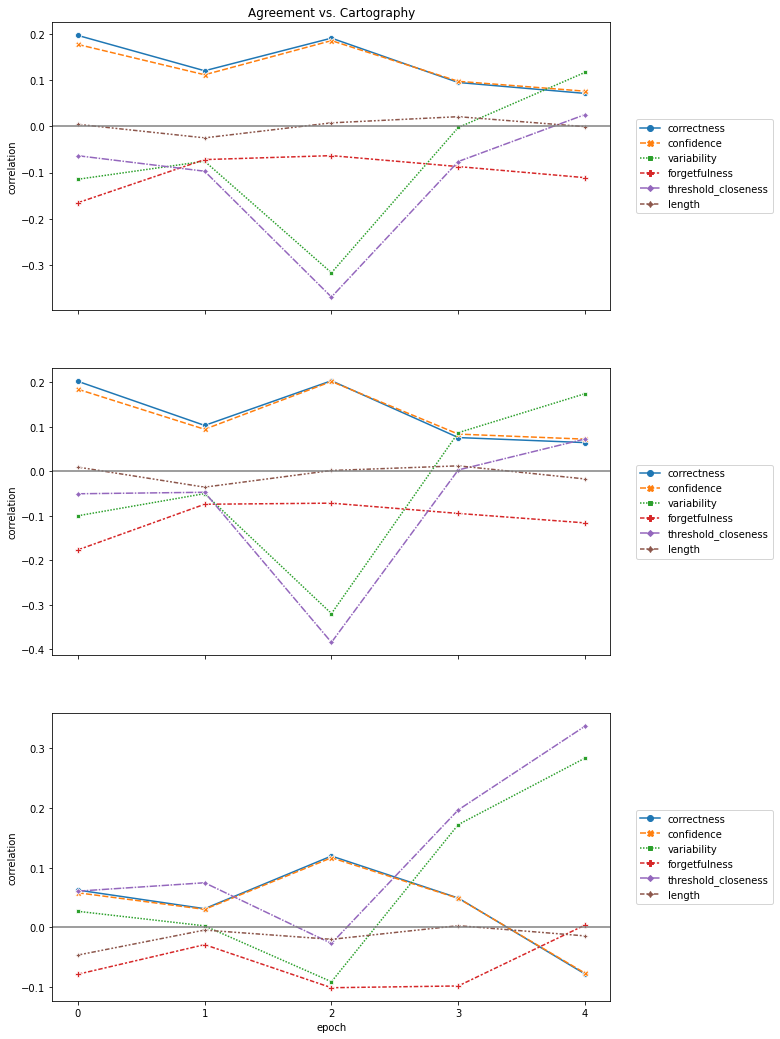

In [7]:
df_corrs = plot_correlations(df_agr, df_crt_test, meta)

In [ ]:
easy = np.where(correctness == 5.)[0]
hard = np.where(correctness == 0.)[0]
ambiguous = np.where((correctness == 2.) | (correctness == 3.))[0]

easy_size = np.minimum(100, easy.size)
hard_size = np.minimum(100, hard.size)
ambiguous_size = np.minimum(100, ambiguous.size)
                   
easy = np.random.choice(easy, replace=False, size=easy_size)
hard = np.random.choice(hard, replace=False, size=hard_size)
ambiguous = np.random.choice(ambiguous, replace=False, size=ambiguous_size)

In [ ]:
amb_labels = []
for ex in test[easy]:
    amb_labels.append(ex.label[1])

In [ ]:
LABEL_MAP = {"1": "positive", "0": "negative"}

In [ ]:
texts = []
tokens = []
labels = []
token_len = 100

for ex in test[easy]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < token_len:
        diff = token_len - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(ex.label[1])

for ex in test[hard]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < token_len:
        diff = token_len - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(ex.label[1])

    
for ex in test[ambiguous]:
    texts.append(ex.text[0])
    toks = ex.text[1]
    if len(toks) < token_len:
        diff = token_len - len(toks)
        toks = toks + ["[PAD]"] * diff
    tokens.append(toks)
    labels.append(ex.label[1])

types = ["easy"] * easy_size + ["hard"] * hard_size + ["ambiguous"] * ambiguous_size

In [ ]:
df_text = pd.DataFrame({"text": texts, "tokens": tokens, "label": labels, "type": types})

In [ ]:
df_attr_cart_easy = df_attr_avg.take(easy)
df_attr_cart_hard = df_attr_avg.take(hard)
df_attr_cart_amb = df_attr_avg.take(ambiguous)

df_attr_cart = pd.concat([df_attr_cart_easy, df_attr_cart_hard, df_attr_cart_amb])

In [ ]:
df_text.index = df_attr_cart.index

In [ ]:
df_sample = pd.concat([df_text, df_attr_cart], axis=1)

In [ ]:
df_sample.to_csv("IMDB_sentences_sample.csv")

In [ ]:
dftest = pd.read_csv("IMDB_sentences_sample.csv", index_col=0)
dftest

In [ ]:
i = 0
corr = agr[agr.index.get_level_values(0) == i].correlation
crt = df_crt_test[df_crt_test.index.get_level_values(1) == i]

In [20]:
df_agr.iloc[0].correlation.shape

(1821,)

In [24]:
df_agr

agreement  \
experiment epoch interpreter                        
0          0     (deeplift, grad-shap)   0.536201   
           1     (deeplift, grad-shap)   0.564190   
           2     (deeplift, grad-shap)   0.394808   
           3     (deeplift, grad-shap)   0.475556   
           4     (deeplift, grad-shap)   0.436748   
...                                           ...   
4          0     (grad-shap, int-grad)   0.863406   
           1     (grad-shap, int-grad)   0.843843   
           2     (grad-shap, int-grad)   0.769509   
           3     (grad-shap, int-grad)   0.794067   
           4     (grad-shap, int-grad)   0.740610   

                                                                              correlation  
experiment epoch interpreter                                                               
0          0     (deeplift, grad-shap)  [0.31168831168831174, 0.6613475177304965, 0.66...  
           1     (deeplift, grad-shap)  [0.4584415584415584, 0.45744680851063835, 0.46...  
           2     (deeplift, grad-shap)  [0.4103896103896104, 0.4273049645390071, 0.515...  
           3     (deeplift, grad-shap)  [0.3584415584415585, 0.26595744680851063, -0.1...  
           4     (deeplift, grad-shap)  [0.15454545454545454, 0.6329787234042554, 0.24...  
...                                                                                   ...  
4          0     (grad-shap, int-grad)  [0.525974025974026, 0.923758865248227, 0.87943...  
           1     (grad-shap, int-grad)  [0.5441558441558442, 0.7464539007092199, 0.867...  
           2     (grad-shap, int-grad)  [0.851948051948052, 0.7180851063829788, 0.5319...  
           3     (grad-shap, int-grad)  [0.8467532467532468, 0.6773049645390071, 0.808...  
           4     (grad-shap, int-grad)  [0.44545454545454555, 0.8528368794326242, 0.76...  

[75 rows x 2 columns]

In [25]:
df_agr_avg

agreement  \
epoch interpreter                        
0     (deeplift, grad-shap)   0.430179   
      (deeplift, int-grad)    0.417573   
      (grad-shap, int-grad)   0.882654   
1     (deeplift, grad-shap)   0.543437   
      (deeplift, int-grad)    0.540765   
      (grad-shap, int-grad)   0.816113   
2     (deeplift, grad-shap)   0.443262   
      (deeplift, int-grad)    0.427008   
      (grad-shap, int-grad)   0.761102   
3     (deeplift, grad-shap)   0.501124   
      (deeplift, int-grad)    0.503823   
      (grad-shap, int-grad)   0.750226   
4     (deeplift, grad-shap)   0.469495   
      (deeplift, int-grad)    0.473415   
      (grad-shap, int-grad)   0.727320   

                                                                   correlation  
epoch interpreter                                                               
0     (deeplift, grad-shap)  [0.42961038961038966, 0.4854609929078014, 0.49...  
      (deeplift, int-grad)   [0.3441558441558442, 0.4173758865248227, 0.393...  
      (grad-shap, int-grad)  [0.8049350649350651, 0.8347517730496454, 0.848...  
1     (deeplift, grad-shap)  [0.5342857142857144, 0.400709219858156, 0.5365...  
      (deeplift, int-grad)   [0.43532467532467545, 0.4964539007092199, 0.51...  
      (grad-shap, int-grad)  [0.6896103896103897, 0.7304964539007093, 0.850...  
2     (deeplift, grad-shap)  [0.5345454545454547, 0.41985815602836885, 0.31...  
      (deeplift, int-grad)   [0.3493506493506494, 0.3216312056737589, 0.406...  
      (grad-shap, int-grad)  [0.6293506493506495, 0.6322695035460992, 0.725...  
3     (deeplift, grad-shap)  [0.44519480519480525, 0.348581560283688, 0.356...  
      (deeplift, int-grad)   [0.4150649350649351, 0.4503546099290781, 0.298...  
      (grad-shap, int-grad)  [0.7038961038961039, 0.6826241134751774, 0.733...  
4     (deeplift, grad-shap)  [0.425974025974026, 0.48085106382978726, 0.321...  
      (deeplift, int-grad)   [0.3714285714285715, 0.35496453900709224, 0.41...  
      (grad-shap, int-grad)  [0.6223376623376623, 0.5982269503546099, 0.666...

In [24]:
ips = meta["interpret_pairs"]

In [26]:
from scipy.stats import pearsonr


corr_vals = []
for (epoch, ip), row in df_agr_avg.iterrows():
    print(f"Epoch {epoch}")
    print("="*100)
    print(f"\tInterpreter pair: {ip}")
    for key in ["correctness", "confidence", "variability", "forgetfulness", "threshold_closeness"]:
        corr = pearsonr(row["correlation"], df_crt_test[key])
        val = {"interpreter": ip, "epoch": epoch, "correlation": corr[0], "p-value": corr[1], "attribute": key}
        corr_vals.append(val)
        print(f"\t\t agreement vs. {key}: {corr}")
    print()

df_corrs = pd.DataFrame(corr_vals)
df_corrs.set_index([""], inplace=True)

Epoch 0
	Interpreter pair: ('deeplift', 'grad-shap')
		 agreement vs. correctness: (0.1955934901555937, 3.690422064652588e-17)
		 agreement vs. confidence: (0.17626582574530883, 3.562368910311751e-14)
		 agreement vs. variability: (-0.1350783147848225, 7.173881403521916e-09)
		 agreement vs. forgetfulness: (-0.1563721107399587, 1.9512200862035692e-11)
		 agreement vs. threshold_closeness: (-0.06777142199740883, 0.0038114060043624807)

Epoch 0
	Interpreter pair: ('deeplift', 'int-grad')
		 agreement vs. correctness: (0.20137230209489876, 4.087780169624161e-18)
		 agreement vs. confidence: (0.18321382263720615, 3.2807595658183227e-15)
		 agreement vs. variability: (-0.12322601312219948, 1.3279258223465717e-07)
		 agreement vs. forgetfulness: (-0.16794576321913962, 5.467274843146346e-13)
		 agreement vs. threshold_closeness: (-0.05520841362487408, 0.018468059962552352)

Epoch 0
	Interpreter pair: ('grad-shap', 'int-grad')
		 agreement vs. correctness: (0.06413372652154024, 0.0061864977579

,interpreter,epoch,correlation,p-value,attribute
0,"(deeplift, grad-shap)",0,0.195593,3.690422e-17,correctness
1,"(deeplift, grad-shap)",0,0.176266,3.562369e-14,confidence
2,"(deeplift, grad-shap)",0,-0.135078,7.173881e-09,variability
3,"(deeplift, grad-shap)",0,-0.156372,1.951220e-11,forgetfulness
4,"(deeplift, grad-shap)",0,-0.067771,3.811406e-03,threshold_closeness
...,...,...,...,...,...
70,"(grad-shap, int-grad)",4,-0.076002,1.171526e-03,correctness
71,"(grad-shap, int-grad)",4,-0.070585,2.580240e-03,confidence
72,"(grad-shap, int-grad)",4,0.289288,1.934877e-36,variability
73,"(grad-shap, int-grad)",4,-0.009169,6.957811e-01,forgetfulness


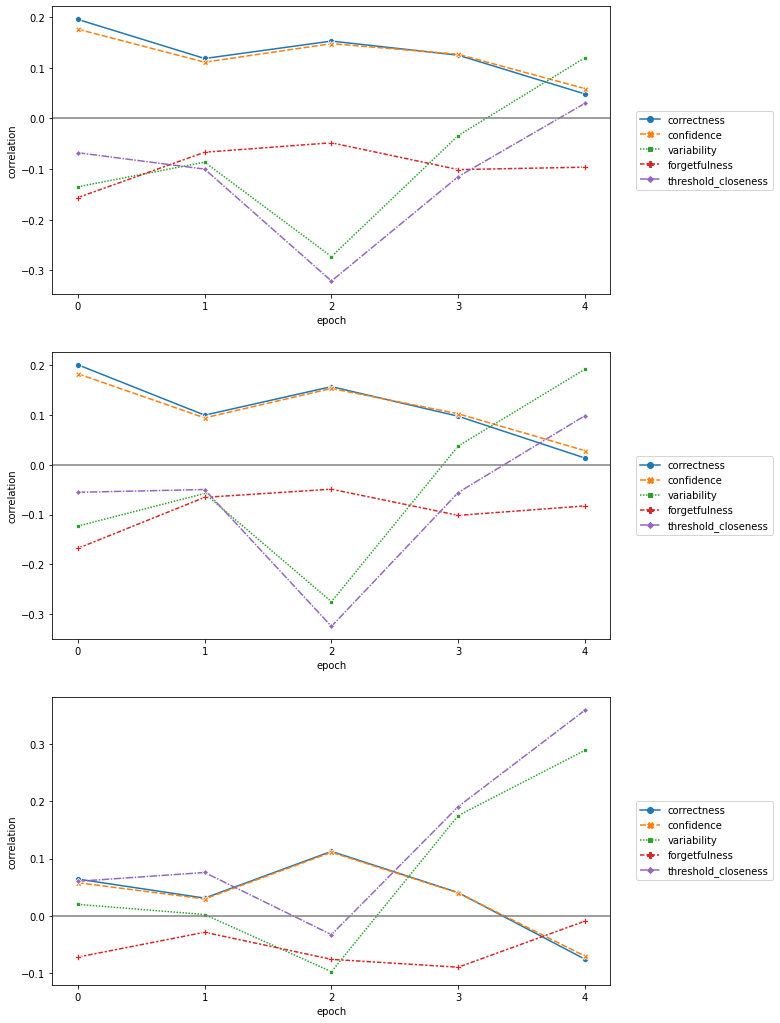

In [38]:
_, axs = plt.subplots(len(ips), figsize=(10, 18))

for i, ip in enumerate(ips):
    df_filt = df_corrs[df_corrs.interpreter == ip]
    g = sns.lineplot(
        ax=axs[i],
        data=df_filt,
        x="epoch",
        y="correlation",
        hue="attribute",
        style="attribute",
        ci="sd",
        markers=True,
        dashes=True,
    )
    g.axhline(0, color="gray")
    g.legend(loc="center right", bbox_to_anchor=(1.3, 0.5), ncol=1)
    g.set(xticks=range(meta["epochs_per_train"]))

In [ ]:
plot_al_accuracy(df_tr, ci=90)

In [ ]:
full = pd.read_csv("IMDB_sample.csv")
sent = pd.read_csv("IMDB_sentences_sample.csv")

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)